<a href="https://colab.research.google.com/github/VihaanS22/API-/blob/main/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

media = files.upload()


Saving heart.csv to heart.csv


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")

print(df.head())

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


In [ ]:
factors = df[["age" , "sex" , "cp" , "chol" , "thalach"]]
target = df["target"]

In [ ]:
from sklearn.model_selection import train_test_split as tt

factors_train, factors_test, target_train, target_test = tt(factors, target, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

factors_train = sc.fit_transform(factors_train)
factors_test = sc.transform(factors_test)

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(factors_train, target_train)


LogisticRegression(random_state=0)

In [ ]:
target_prediction = classifier.predict(factors_test)

predicted_values = []

for i in target_prediction:

  if i == 0:
    predicted_values.append("No")

  else:
    predicted_values.append("Yes")

actual_values = []

for j in target_test.ravel():

  if j == 0:
    actual_values.append("No")

  else:
    actual_values.append("Yes")



[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

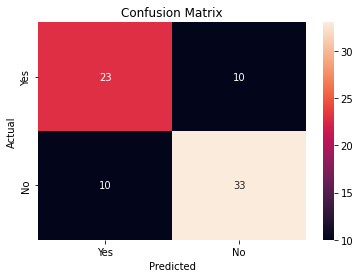

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = ["Yes", "No"]
cm = confusion_matrix(actual_values, predicted_values)

ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


true positives = actual value was yes and predicted value was also yes(23)

true negatives = actual value was no and predicted value was also no(33)

-----

false positives = actual value was no but predicted value was yes(lower 10)

false negatives = actual value was yes but predicted value was no(upper 10)


In [ ]:
accuracy = (23+33)/(23+33+10+10)
print(accuracy)

0.7368421052631579
